# Сборный проект №1   "Определение закономерностей, определяющих успешность игры"

Перед нами  данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. 

Планируется кампания на следующий год. Нужно отработать принцип работы с данными и  выявить определяющие успешность игры закономерности. 


**Описание данных**

- В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.



**Примечание:**
*Данные могут быть неполными.*



**Ход исследования**

Путь к файлам:
- /datasets/games.csv

О качестве данных ничего не известно. Поэтому перед проверкой гипотез проведем обзор данных. 

Проверим данные на ошибки и оценим их влияние на исследование. На этапе предобработки исправим самые критичные ошибки данных.
 
Таким образом, исследование содержит три этапа:
 1. Обзор данных.
 2. Предобработка данных.
 3. Проверка гипотез.

## Обзор и подготовка данных

In [74]:
from IPython.display import display
import pandas as pd
pd.set_option('display.max_columns', None) 
import datetime
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np
import pandas as pd
import seaborn as sns 

pd.set_option('display.max_rows', None)
 
pd.set_option('display.max_columns', None)
 
pd.set_option('display.max_colwidth', None)

In [75]:
df_games = pd.read_csv('/datasets/games.csv')
#общая информация о таблице
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Данные об играх за 2016 год представляют собой 16715 строк. Видны пропуски в нескольких столбцах, а  также неверные форматы данных и неудобный регистр.

In [76]:
#печать первых 10 строк таблицы данных
df_games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


### Изменение регистра названий столбцов:

In [77]:
df_games.columns =  df_games.columns.str.lower()
#проверим
df_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Изменение типа данных

На первый взгляд, из общей информации о таблице видно, что данные по столбцу *'user_score'* имеет неверный формат (object вместо float). Проверим уникальные знаечния:

In [78]:
display(df_games['user_score'].unique())

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Встречается значение 'tbd' и nan. 

tbd - сокращение, которое часто используется в сфере компьютерных игр и расшифровывается очень просто - To Be Determined, то есть "Будет определено". Посмотрим, как много таких строк:

In [79]:
df_games[df_games['user_score']=='tbd']['user_score'].count()

2424

2424 строки с таким значением, довольно много.

Т.к. мы говорим о столбце оценки, в которой не определено значение, то заменим 'tbd' на пустое значение. И изменим формат данных

In [80]:
df_games['user_score'] = df_games['user_score'].replace('tbd','')
df_games['user_score'] = pd.to_numeric(df_games['user_score'])

Формат данных по столбцу *'year_of_release'* имеет формат float64, пока оставим его без изменений, тк предположительно для дальнейшего анализа достаточно будет текущего формата

In [81]:
df_games.info()#проверим

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


In [82]:
df_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Теперь все столбцы таблицы имеют верный формат. 

### Работа с пропусками

По нескольким столбцам видны пропуски. Посчитаем их:

In [83]:
df_games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

Пропуски в столбце названия игры *'name'* оставим пока без изменений.
Пропуск может быть связан с искаженными данными. Даже если в дальнейшем нам придется удалить 2 строки, то они никак не исказят анализ.

Пропуски в столбце года выпуска так же оставим без изменений на данном этапе.
Пропуски могут быть связаны с утерей данных по году выпуска каких-то устаревших игр. К тому же пропуски составляют 1,6%.


Пропуски в столбцах оценок и рейтинга также оставляем без изменений, тк присваивание значений 0 может в дальнейшем сильно изменить картину. К тому же в столбце *'user_score'* встречается значение 0. Пропуски могут быть связаны с отсутствием оценок по каким-то непопулярным играм. Или например с тем, что было еще слишком мало оценок, чтобы вывести ее, как какую-то устойчивую оценку.

### Добавление данных

Создадим столбец суммарных продаж во всех регионах:

In [84]:
df_games['all_sales'] = df_games['na_sales'] + df_games['eu_sales'] + df_games['jp_sales'] + df_games['other_sales']
df_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


### ВЫВОДЫ

Проведен анализ предоставленных данных от Заказчика. Произведена корректировка регистра названий столбцов, изменение типов данных нескольких столбцов, проанализированы пропуски данных. Дополнительно создан новый столбец данных касаемо суммарных продажах во всех указанных регионах. 

## Анализ данных

### Проверим, сколько игр выпускалось в разные годы:

In [85]:
df_games.groupby('year_of_release')['year_of_release'].count()

year_of_release
1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      62
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     350
2001.0     482
2002.0     829
2003.0     775
2004.0     762
2005.0     939
2006.0    1006
2007.0    1197
2008.0    1427
2009.0    1426
2010.0    1255
2011.0    1136
2012.0     653
2013.0     544
2014.0     581
2015.0     606
2016.0     502
Name: year_of_release, dtype: int64

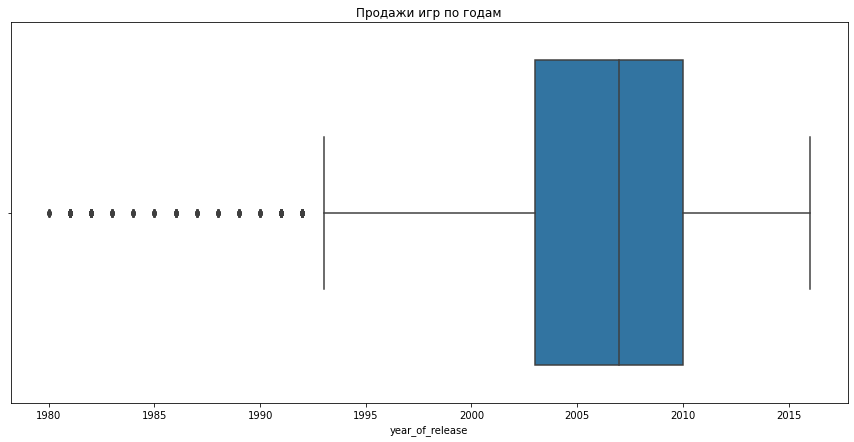

In [86]:
plt.figure(figsize=(15,7))
plt.ylim(0,2)
sns.boxplot(x=df_games['year_of_release']);

plt.title('Продажи игр по годам')
plt.show()

Видно, что до 1994 года выпуск игр был малоактивный. Попробуем убрать строки с играми этих годов:

In [87]:
df_games = df_games[df_games['year_of_release'] > 1993]
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16079 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16079 non-null  object 
 1   platform         16079 non-null  object 
 2   year_of_release  16079 non-null  float64
 3   genre            16079 non-null  object 
 4   na_sales         16079 non-null  float64
 5   eu_sales         16079 non-null  float64
 6   jp_sales         16079 non-null  float64
 7   other_sales      16079 non-null  float64
 8   critic_score     7980 non-null   float64
 9   user_score       7460 non-null   float64
 10  rating           9764 non-null   object 
 11  all_sales        16079 non-null  float64
dtypes: float64(8), object(4)
memory usage: 1.6+ MB


Количество строк сократилось на 3,8%.
**Выводы:**
- Таблица с данными сообщений имеет пропуски по столбцам оценок и рейтинга, заполнение таких пропусков исключено
- Все данные в таблице имеют подходящий для анализа формат

### Посмотрим, как менялись продажи по платформам

Выберем платформы с наибольшими суммарными продажами. Для этого выделим отдельную сводную таблицу, в которой отобразим суммарные продажи по каждой платформе:

In [88]:
df_games_platform = df_games.pivot_table(index=['platform'], values=['all_sales'], aggfunc = 'sum').sort_values(by='all_sales',ascending=False).reset_index()
display(df_games_platform)

,platform,all_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.76
5,PS,727.58
6,PS4,314.14
7,GBA,312.88
8,PSP,289.53
9,3DS,257.81


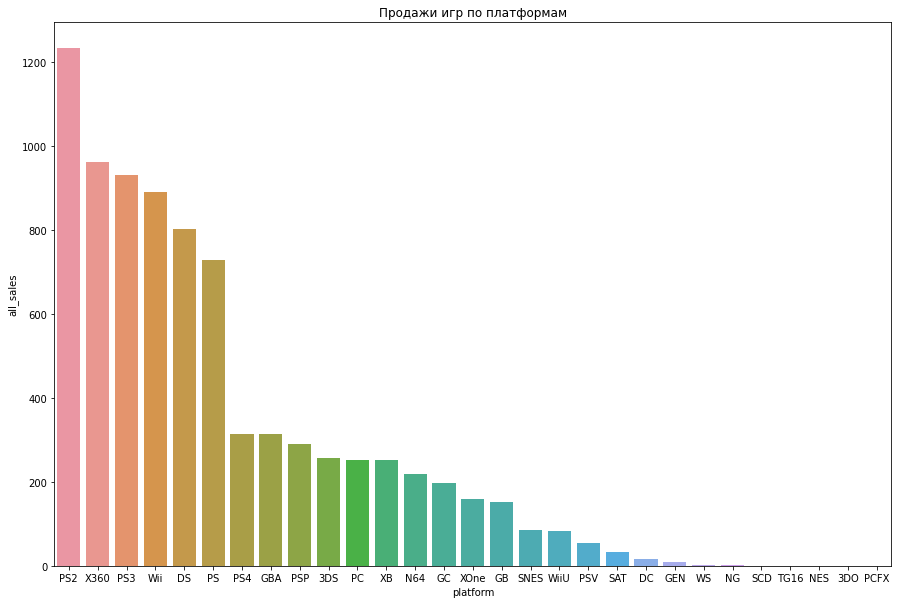

In [89]:
plt.figure(figsize=(15,10))
sns.barplot(x=df_games_platform.platform, y=df_games_platform.all_sales)
plt.title('Продажи игр по платформам')

plt.show()

Выберем платформы с наибольшими продажами. Пусть это будут платформы с продажами свыше 300 млн копий:

In [90]:
#создадим список топ-платформ. который пригодится нам в дальнейшем анализе
top_platform = []
for index in range(len(df_games_platform)):
    if df_games_platform['all_sales'][index] >= 300:
        top_platform.append(df_games_platform['platform'][index])
print(top_platform)

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA']


Итак, мы видим топ-8. Проанализируем, за какой срок появляются новые и исчезают старые платформы. Для этого нам понадобится год релизов платформ:

In [91]:
df_games_platform_year = df_games.pivot_table(index=['year_of_release','platform'], values=['all_sales'], aggfunc = 'sum').sort_values(by=['platform','year_of_release'],ascending=True).reset_index()
display(df_games_platform_year)

,year_of_release,platform,all_sales
0,1994.0,3DO,0.02
1,1995.0,3DO,0.08
2,2011.0,3DS,63.20
3,2012.0,3DS,51.36
4,2013.0,3DS,56.57
5,2014.0,3DS,43.76
6,2015.0,3DS,27.78
7,2016.0,3DS,15.14
8,1998.0,DC,3.38
9,1999.0,DC,5.16


Теперь для каждой топ-платформы построим гистограммы распределения продаж по годам:

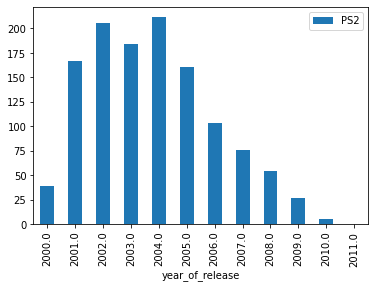

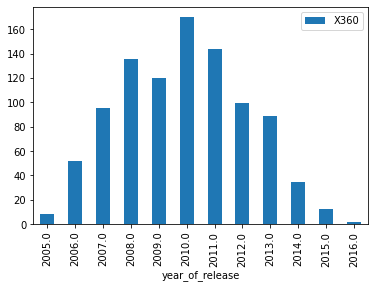

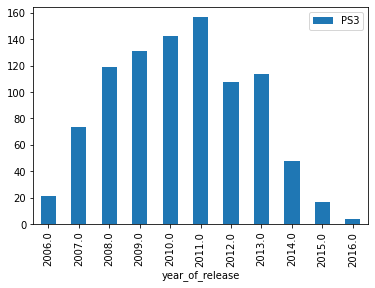

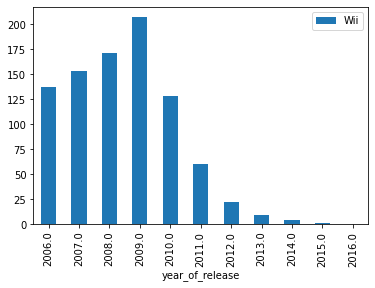

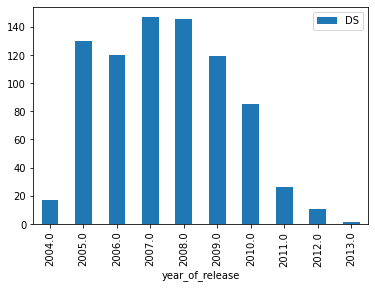

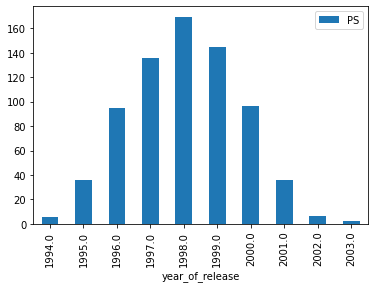

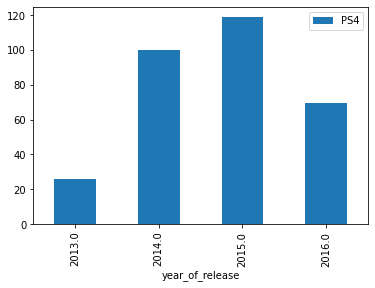

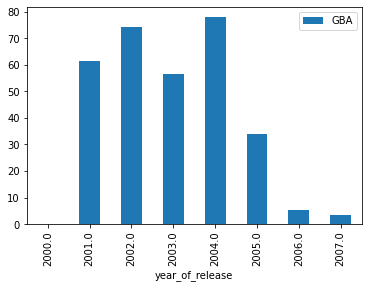

In [92]:
for el in top_platform:
    df = (df_games_platform_year[df_games_platform_year['platform'] == el]).sort_values(by = 'year_of_release')
    x = df_games_platform_year['year_of_release']
    y = df_games_platform_year['all_sales']
    df.plot.bar(x='year_of_release',y='all_sales', label= el)

Из полученных графиков видно, что время жизни платформ в среднем 10 лет. Но уже на данный момент (к примеру, к 2016 году) анализ показывает, что время жизни платформ сокращается. Если раньше платформа могла существовать 10 лет от релиза до полного падения продаж, то сейчас такой срок сокращается все сильнее. И время жизни уже не 10 лет, а 5 лет. Логично! Ведь игровой бизнес разивавается в нынешних условиях оченб быстро, и очень быстро реагирует на изменения требования и желаний пользователя.

Посмотрим теперь на все топ-платформы вместе:

<BarContainer object of 197 artists>

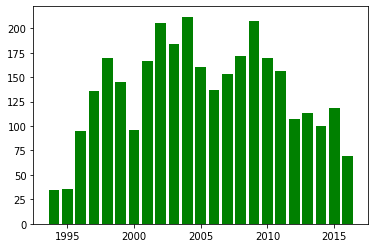

In [93]:
plt.bar(x, y,color='g')

Здесь явно видно, что каждые 5 лет - это циклы жизни той или иной платформы(а возможно нескольких конкурентных платформ одновременно). **Примем 5 лет за характерный срок появления и исчезновения платформ (АКТУАЛЬНЫЙ ПЕРИОД)**. 

### Посмотрим данные за последние 5 лет (актуальный период)

In [94]:
df_games_years = df_games_platform_year.query('year_of_release>= 2012').pivot_table(index=['year_of_release','platform'], values=['all_sales']).sort_values(by=['year_of_release','all_sales'],ascending=False).reset_index()
display(df_games_years)

,year_of_release,platform,all_sales
0,2016.0,PS4,69.25
1,2016.0,XOne,26.15
2,2016.0,3DS,15.14
3,2016.0,PC,5.25
4,2016.0,WiiU,4.60
5,2016.0,PSV,4.25
6,2016.0,PS3,3.60
7,2016.0,X360,1.52
8,2016.0,Wii,0.18
9,2015.0,PS4,118.90


Из полученной сводной таблицы мы можем извлечь лидирующие по продажам в каждом году  платформы:

In [95]:
top_platform_leader = ['PS3', '3DS','X360', 'PS4','XOne']

Продажи этих платформ закономерно растут в начале, потом начинают падать, т.к. со временем приходит "смена" платформы. Однако выбранные нами платформы смело можно назвать потенциально прибыльными!

Сформируем по этим платформам данные:

In [96]:
df_games_top_platform = df_games.loc[(df_games.platform == 'PS3') | (df_games.platform == 'PS4') | (df_games.platform == '3DS') | (df_games.platform == 'X360') | (df_games.platform == 'XOne')].sort_values(by='platform').reset_index(drop=True)
display(df_games_top_platform)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Art Academy: Lessons for Everyone,3DS,2012.0,Action,0.20,0.04,0.21,0.02,81.0,7.6,E,0.47
1,My Hero Academia: Battle for All,3DS,2016.0,Action,0.00,0.00,0.04,0.00,NaN,NaN,NaN,0.04
2,Nazotoki Battle Tore! Densetsu no Makyuu o Fukkatsu Saseyo!,3DS,2014.0,Action,0.00,0.00,0.06,0.00,NaN,NaN,NaN,0.06
3,Yoshi's New Island,3DS,2014.0,Platform,0.48,0.53,0.28,0.09,64.0,6.1,E,1.38
4,Bravely Default: Flying Fairy,3DS,2012.0,Role-Playing,0.50,0.32,0.49,0.08,NaN,NaN,NaN,1.39
5,FabStyle,3DS,2011.0,Strategy,0.00,0.00,0.03,0.00,NaN,NaN,NaN,0.03
6,Cooking Mama: My Sweets Shop,3DS,2014.0,Simulation,0.00,0.00,0.03,0.00,NaN,NaN,NaN,0.03
7,Tekken 3D: Prime Edition,3DS,2012.0,Fighting,0.06,0.07,0.05,0.01,64.0,5.9,T,0.19
8,Code of Princess,3DS,2012.0,Action,0.16,0.00,0.03,0.01,67.0,7.6,T,0.20
9,Nicola Kanshuu: Model * Oshare Audition 2,3DS,2011.0,Action,0.00,0.00,0.06,0.00,NaN,NaN,NaN,0.06


Для выбранных нами платформ построим график "ящик с усами" по глобальным продажам игр в разбивке по платформам:

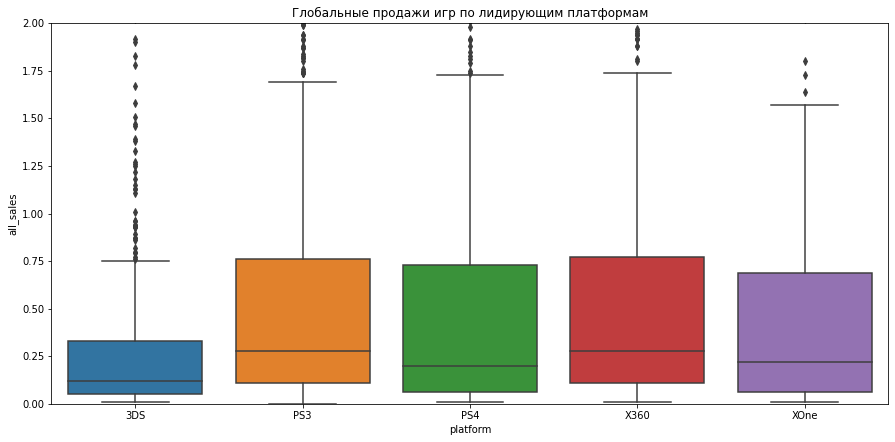

In [97]:
plt.figure(figsize=(15,7))
plt.ylim(0,2)
sns.boxplot(x=df_games_top_platform['platform'], y=df_games_top_platform['all_sales']);

plt.title('Глобальные продажи игр по лидирующим платформам')
plt.show()

Из полученного графика видно, что по каждой лидирующей платформе есть выбросы по продажам, которые в дальнейшем мы не будем учитывать.

### Влияние оценок критиков и пользоваталей на продажи PS4

Рассмотрим одну из платформ (например, PS4). И на ее примере разберем влияние отзывов пользователей и критиков на продажи:

In [98]:
df_games_PS4 = df_games_top_platform.loc[(df_games_top_platform.platform == 'PS4')].sort_values(by='all_sales',ascending=False).reset_index(drop=True)
#дополнительно переведем оценку критиков в 10-балльную систему
df_games_PS4['critic_score'] = df_games_PS4['critic_score'] /10 

display(df_games_PS4)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
1,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,9.7,8.3,M,12.62
2,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,8.2,4.3,E,8.58
3,Star Wars Battlefront (2015),PS4,2015.0,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
4,Call of Duty: Advanced Warfare,PS4,2014.0,Shooter,2.81,3.48,0.14,1.23,8.3,5.7,M,7.66
5,FIFA 17,PS4,2016.0,Sports,0.66,5.75,0.08,1.11,8.5,5.0,E,7.60
6,Fallout 4,PS4,2015.0,Role-Playing,2.53,3.27,0.24,1.13,8.7,6.5,M,7.17
7,FIFA 15,PS4,2014.0,Sports,0.80,4.33,0.05,0.90,8.2,5.7,E,6.08
8,Destiny,PS4,2014.0,Shooter,2.49,2.07,0.16,0.92,7.6,6.1,T,5.64
9,Uncharted 4: A Thief's End,PS4,2016.0,Shooter,1.85,2.50,0.19,0.85,9.3,7.9,T,5.39


Построим диаграммы рассеяния:

<AxesSubplot:title={'center':'Зависимость продаж от оценок пользователей PS4'}, xlabel='all_sales', ylabel='user_score'>

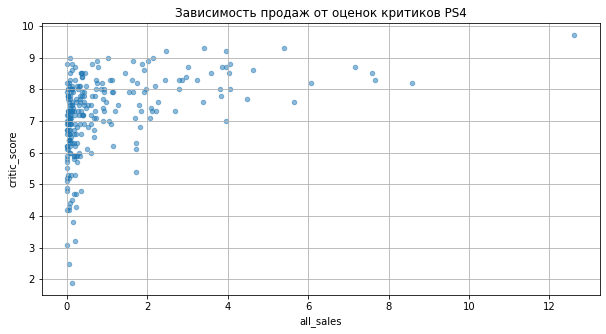

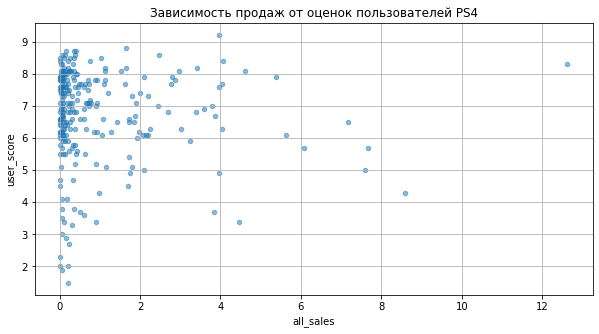

In [99]:
df_games_PS4.plot(x='all_sales',y='critic_score',kind='scatter',grid=True,figsize=(10,5),alpha=0.5, title ='Зависимость продаж от оценок критиков PS4')

df_games_PS4.plot(x='all_sales',y='user_score',kind='scatter',grid=True,figsize=(10,5),alpha=0.5, title ='Зависимость продаж от оценок пользователей PS4')

Из полученных диаграмм рассеяния кажется, что больше продаж находится в зависимости от рейтинга игры - продажи концентрируются в зоне 5-9 баллов. 

Посмотрим на коррелиции между отзывами и продажами:

In [100]:
print('Корреляция между оценкой критиков и продажами:', df_games_PS4['all_sales'].corr(df_games_PS4['critic_score']))
print('Корреляция между оценкой пользователей и продажами:',df_games_PS4['all_sales'].corr(df_games_PS4['user_score']))

Корреляция между оценкой критиков и продажами: 0.4065679020617812
Корреляция между оценкой пользователей и продажами: -0.031957110204556424


Мы получили довольно необычный результат: продажи вплотную не зависят ни от отзывов критиков, ни от отзывов пользователей. Да, наблюдается небольшая зависимость от критик-оценки, но она не такая очевидная, как мы видим, например, на диаграмме рассеяния!!!

### Влияние оценок критиков и пользоваталей на продажи PS3, 3DS, X360, XOne

#### PS3

Корреляция между оценкой критиков и продажами: 0.43275895789971364
Корреляция между оценкой пользователей и продажами: 0.12841562938563028


<AxesSubplot:title={'center':'Зависимость продаж от оценок пользователей PS3'}, xlabel='all_sales', ylabel='user_score'>

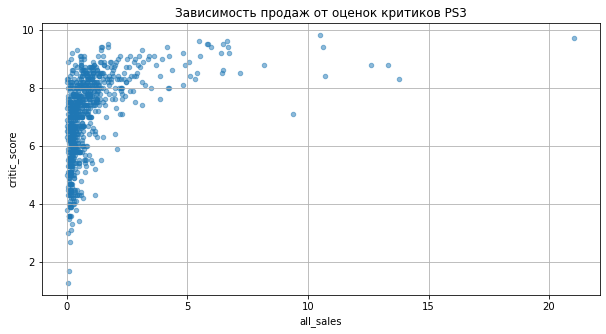

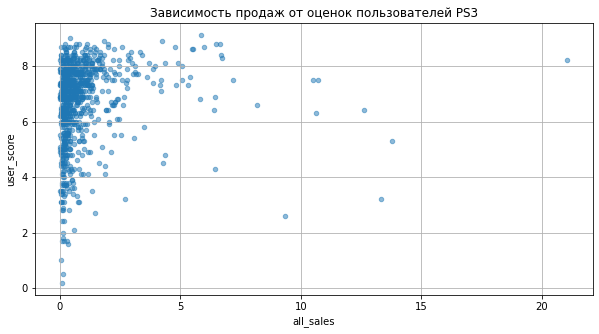

In [101]:
df_games_PS3 = df_games_top_platform.loc[(df_games_top_platform.platform == 'PS3')].sort_values(by='all_sales',ascending=False).reset_index(drop=True)
df_games_PS3['critic_score'] = df_games_PS3['critic_score'] /10 

print('Корреляция между оценкой критиков и продажами:', df_games_PS3['all_sales'].corr(df_games_PS3['critic_score']))
print('Корреляция между оценкой пользователей и продажами:',df_games_PS3['all_sales'].corr(df_games_PS3['user_score']))

df_games_PS3.plot(x='all_sales',y='critic_score',kind='scatter',grid=True,figsize=(10,5),alpha=0.5, title ='Зависимость продаж от оценок критиков PS3')
df_games_PS3.plot(x='all_sales',y='user_score',kind='scatter',grid=True,figsize=(10,5),alpha=0.5, title ='Зависимость продаж от оценок пользователей PS3')

#### 3DS

Корреляция между оценкой критиков и продажами: 0.28871176517075003
Корреляция между оценкой пользователей и продажами: 0.22207843643390884


<AxesSubplot:title={'center':'Зависимость продаж от оценок пользователей PS3'}, xlabel='all_sales', ylabel='user_score'>

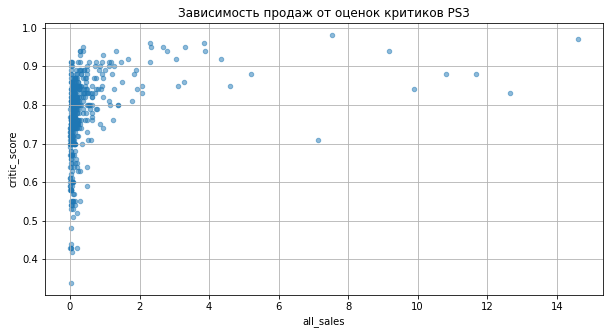

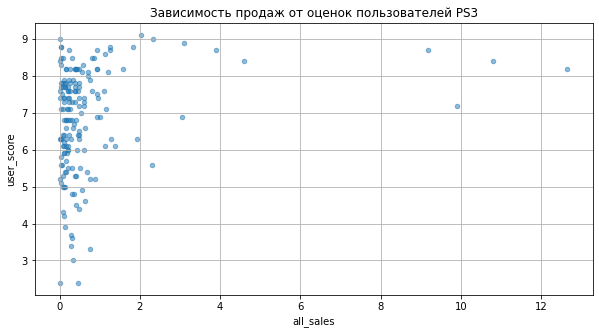

In [102]:
df_games_3DS = df_games_top_platform.loc[(df_games_top_platform.platform == '3DS')].sort_values(by='all_sales',ascending=False).reset_index(drop=True)
df_games_3DS['critic_score'] = df_games_PS3['critic_score'] /10 

print('Корреляция между оценкой критиков и продажами:', df_games_3DS['all_sales'].corr(df_games_3DS['critic_score']))
print('Корреляция между оценкой пользователей и продажами:',df_games_3DS['all_sales'].corr(df_games_3DS['user_score']))

df_games_3DS.plot(x='all_sales',y='critic_score',kind='scatter',grid=True,figsize=(10,5),alpha=0.5, title ='Зависимость продаж от оценок критиков PS3')
df_games_3DS.plot(x='all_sales',y='user_score',kind='scatter',grid=True,figsize=(10,5),alpha=0.5, title ='Зависимость продаж от оценок пользователей PS3')

#### X360

Корреляция между оценкой критиков и продажами: 0.3928658925400698
Корреляция между оценкой пользователей и продажами: 0.11418661214018046


<AxesSubplot:title={'center':'Зависимость продаж от оценок пользователей PS3'}, xlabel='all_sales', ylabel='user_score'>

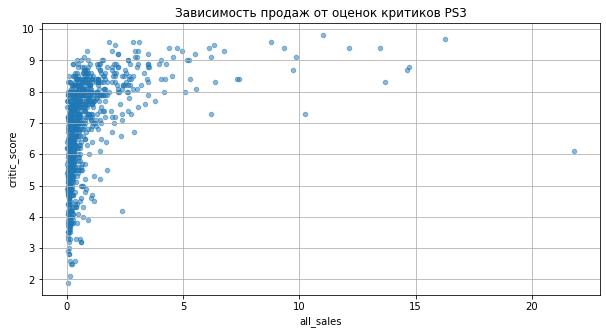

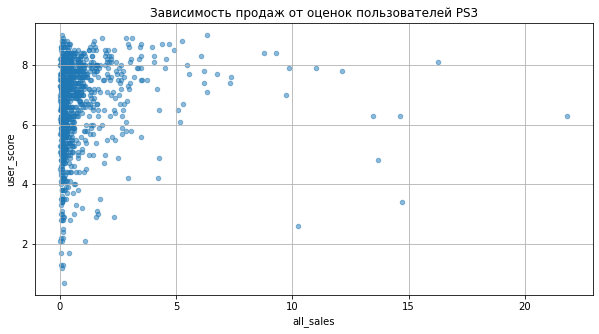

In [103]:
df_games_X360 = df_games_top_platform.loc[(df_games_top_platform.platform == 'X360')].sort_values(by='all_sales',ascending=False).reset_index(drop=True)
df_games_X360['critic_score'] = df_games_X360['critic_score'] /10 

print('Корреляция между оценкой критиков и продажами:', df_games_X360['all_sales'].corr(df_games_X360['critic_score']))
print('Корреляция между оценкой пользователей и продажами:',df_games_X360['all_sales'].corr(df_games_X360['user_score']))

df_games_X360.plot(x='all_sales',y='critic_score',kind='scatter',grid=True,figsize=(10,5),alpha=0.5, title ='Зависимость продаж от оценок критиков PS3')
df_games_X360.plot(x='all_sales',y='user_score',kind='scatter',grid=True,figsize=(10,5),alpha=0.5, title ='Зависимость продаж от оценок пользователей PS3')

#### XOne

Корреляция между оценкой критиков и продажами: 0.41699832800840186
Корреляция между оценкой пользователей и продажами: -0.06892505328279412


<AxesSubplot:title={'center':'Зависимость продаж от оценок пользователей PS3'}, xlabel='all_sales', ylabel='user_score'>

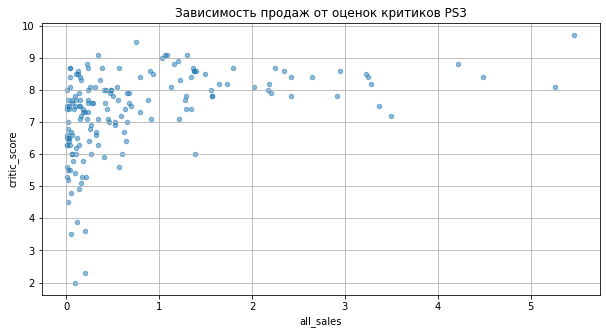

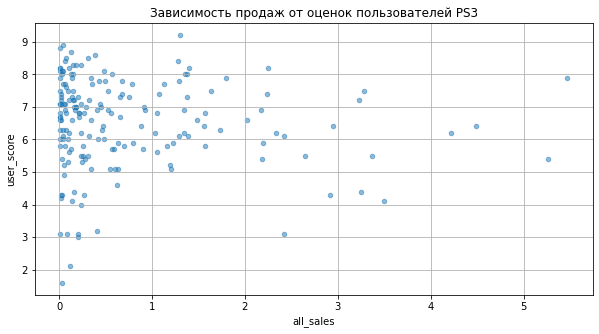

In [104]:
df_games_XOne = df_games_top_platform.loc[(df_games_top_platform.platform == 'XOne')].sort_values(by='all_sales',ascending=False).reset_index(drop=True)
df_games_XOne['critic_score'] = df_games_XOne['critic_score'] /10 

print('Корреляция между оценкой критиков и продажами:', df_games_XOne['all_sales'].corr(df_games_XOne['critic_score']))
print('Корреляция между оценкой пользователей и продажами:',df_games_XOne['all_sales'].corr(df_games_XOne['user_score']))

df_games_XOne.plot(x='all_sales',y='critic_score',kind='scatter',grid=True,figsize=(10,5),alpha=0.5, title ='Зависимость продаж от оценок критиков PS3')
df_games_XOne.plot(x='all_sales',y='user_score',kind='scatter',grid=True,figsize=(10,5),alpha=0.5, title ='Зависимость продаж от оценок пользователей PS3')

Проанализировав одним и тем же методом продажи  на нескольких топ-платформах, видно, что зависимости продаж от оценки не наблюдается!!!

### Распределение игр по жанрам

Посмотрим на распределение игр по жанрам и определим самые прибылтные из них. Для этого выделим сводную таблицу из нашей общей таблицы игр:

In [105]:
df_games_genre = df_games.pivot_table(index=['genre'], values=['all_sales'], aggfunc = 'mean').sort_values(by='all_sales',ascending=False).reset_index()

display(df_games_genre)

,genre,all_sales
0,Platform,0.782161
1,Shooter,0.776025
2,Role-Playing,0.617229
3,Racing,0.573567
4,Sports,0.560504
5,Action,0.510422
6,Fighting,0.504975
7,Misc,0.454909
8,Simulation,0.449753
9,Puzzle,0.298321


Дополнительно построим гистограмму продаж:

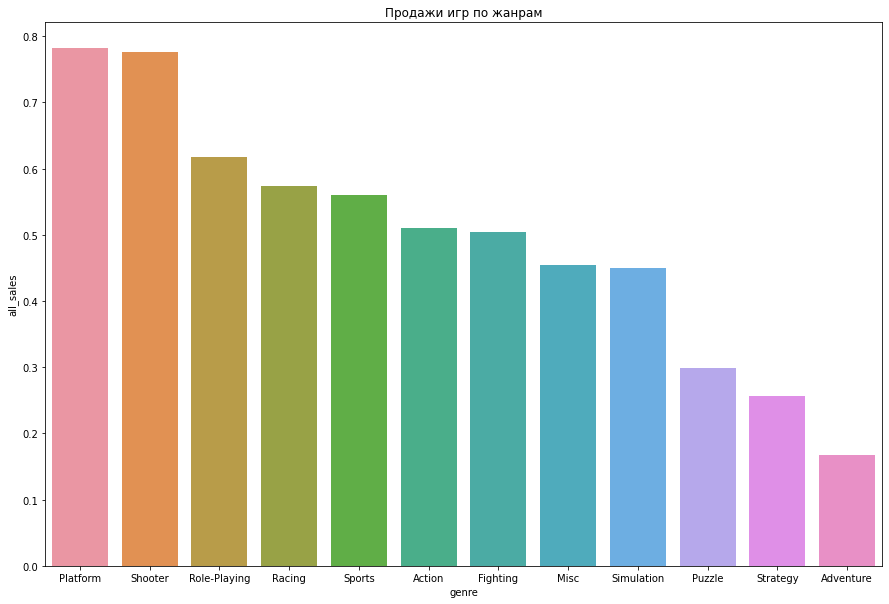

In [106]:
plt.figure(figsize=(15,10))
sns.barplot(x=df_games_genre.genre, y=df_games_genre.all_sales)
plt.title('Продажи игр по жанрам')

plt.show()

Из такого графика видно самые топовые жанры с высокими продажами - platform, sports, role-playing.

А также можно выделить игры с низкими продажами - puzzle, strategy, adventure.

## Портрет пользователя каждого региона

Составим портрет пользователя для каждого региона - определим самые популярные платформы (топ-5), самые популярные жанры (топ-5) и посмотрим, влияет ли рейтинг ESRB на продажи в каждом регионе.

In [115]:
#специальная функция, которая проведет оценку всех параметров пользователя
def users(sales, name): 
    df_region_sales = df_games.pivot_table(index=['platform'], values=[sales], aggfunc = 'sum').sort_values(by=sales,ascending=False).reset_index()
    
    plt.figure(figsize=(10,5))
    sns.barplot(x=df_region_sales['platform'], y=df_region_sales[sales])
    plt.title('Продажи по платформам_' + name)
    plt.show()
    
    df_region_games = df_games.pivot_table(index=['genre'], values=[sales], aggfunc = 'sum').sort_values(by=sales,ascending=False).reset_index()
    
    plt.figure(figsize=(10,5))
    sns.barplot(x=df_region_games['genre'], y=df_region_games[sales])
    plt.title('Продажи по жанрам_' + name)
    plt.show()
    
    plt.figure(figsize=(5,5))
    sns.barplot(x=df_games['rating'], y=df_games[sales])
    plt.title('Зависимость продаж от возрастного рейтинга_' + name)
    plt.show()

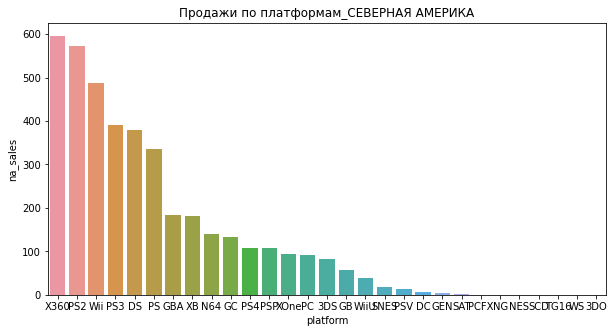

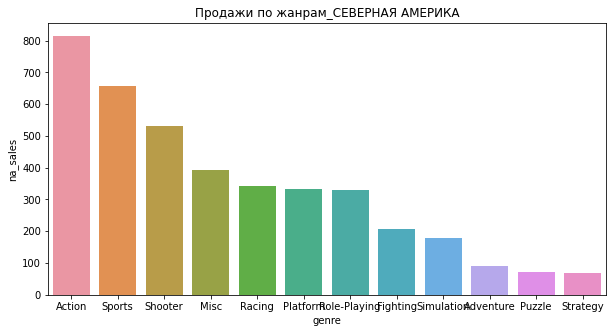

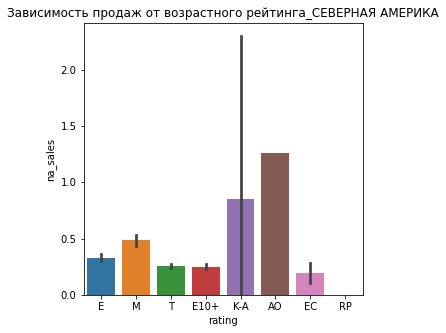

In [116]:
users('na_sales','СЕВЕРНАЯ АМЕРИКА')    


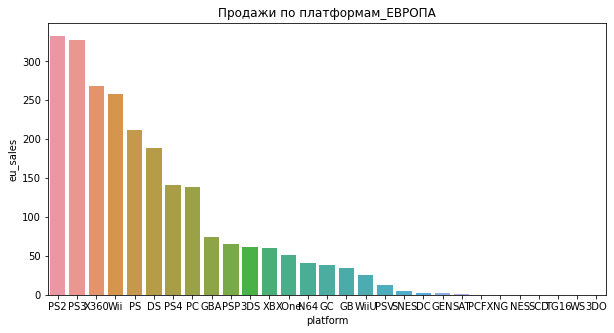

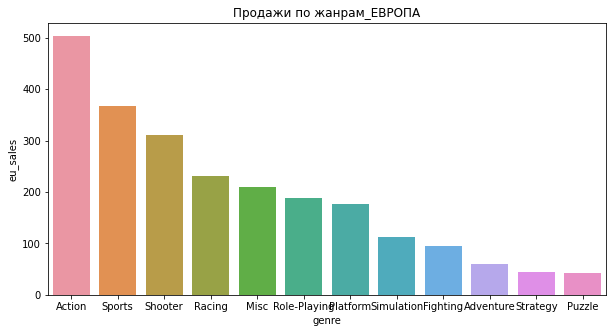

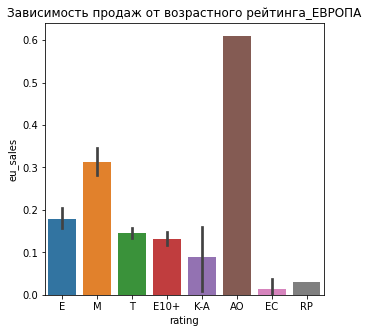

In [117]:
users('eu_sales','ЕВРОПА')

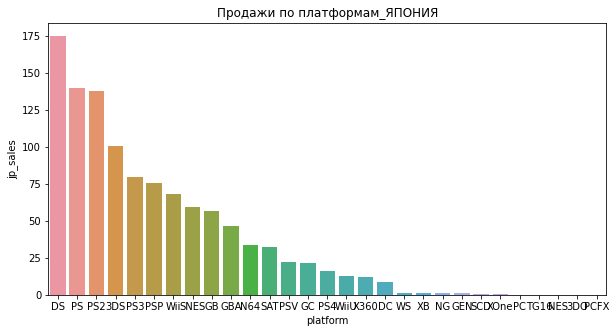

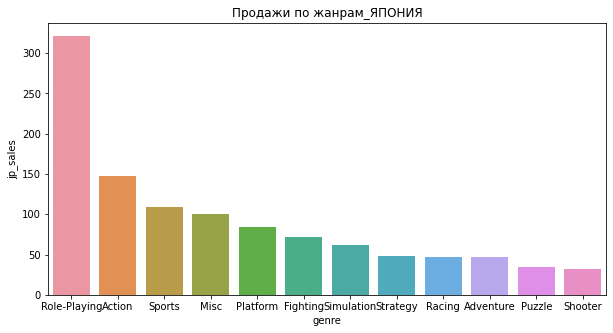

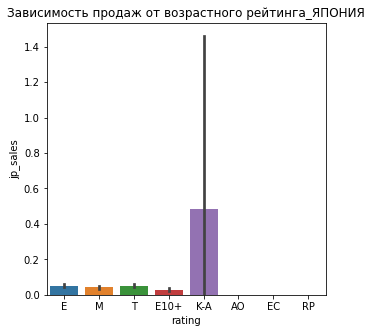

In [118]:
users('jp_sales','ЯПОНИЯ')

### ВЫВОДЫ

Из графиков видно, что
- пользователь из Северной Америки:
  - *предпочитает платформы X360 / PS2 / Wii / PS3*
  - *выбирает жанры Action / Sports / Shooter*
  - *покупает больше игр возрастных рейтингов Adults Only 18+ (АО) и Для детей (К-А)*
  
- пользователь из Европы:
  - *предпочитает платформы PS2 / PS3 / X360 / Wii*
  - *выбирает жанры Action / Sports / Shooter*
  - *покупает больше игр возрастных рейтингов Adults Only 18+ (АО) и Mature 17+ (M)*
  
- пользователь из Японии:
  - *предпочитает платформы DS / PS / PS2 / 3DS*
  - *выбирает жанры Role Playing / Action / Sports *
  - *покупает ЗАМЕТНО больше игр возрастных рейтингов Для детей (К-А)*  

## Проверка гипотез

Далее требуется проверить две гипотезы:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

### Гипотеза "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые"

Для проверки гипотезы используем таблицу на основе **'df_games'**.

In [119]:
df_games_xone_pc = df_games.loc[(df_games.platform == 'XOne') | (df_games.platform == 'PC')].reset_index(drop=True)

In [120]:
df_games_xone_pc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1197 non-null   object 
 1   platform         1197 non-null   object 
 2   year_of_release  1197 non-null   float64
 3   genre            1197 non-null   object 
 4   na_sales         1197 non-null   float64
 5   eu_sales         1197 non-null   float64
 6   jp_sales         1197 non-null   float64
 7   other_sales      1197 non-null   float64
 8   critic_score     865 non-null    float64
 9   user_score       934 non-null    float64
 10  rating           939 non-null    object 
 11  all_sales        1197 non-null   float64
dtypes: float64(8), object(4)
memory usage: 112.3+ KB


Для проверки гипотезы пропуски в столбце оценок пользователей необходимо убрать.

In [121]:
df_games_xone_pc['user_score'] = df_games_xone_pc['user_score'].fillna(0)

О большом объёме данных, генеральной совокупности, мы будем судить по части — случайной выборке, которая у нас имеется.
Сформулируем нулевую и ненулевую гипотезы:
- H₀: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- H₁: Средние пользовательские рейтинги платформ Xbox One и PC отличаются.

Остается только на основе данных сделать выбор: отклонить нулевую гипотезу в пользу альтернативной или нет.

Для этого нужно посчитать вероятность получить наблюдаемое на выборке среднее значение при условии, что нулевая гипотеза верна. Если вероятность большая — отвергать нулевую гипотезу вряд ли стоит.

У нас есть две выборки - данные по платформе XOne и по платформе PC. Проверим дисперсии выборок по параметру рейтингов за платформу:

In [122]:
df_games_xone_pc = df_games_xone_pc.loc[(df_games_xone_pc.user_score != 0)].reset_index(drop=True)

In [123]:
variance_xone = np.var(df_games_xone_pc.query('platform == "XOne"')['user_score'], ddof=1)
variance_pc = np.var(df_games_xone_pc.query('platform == "PC"')['user_score'], ddof=1)

print(variance_xone) 
print('')
print(variance_pc) 

1.9069968429360695

2.3231900019831713


Теперь посмотрим на распределение выборок:

In [124]:
print(df_games_xone_pc.query('platform == "XOne"')['user_score'].describe())
print('')
print(df_games_xone_pc.query('platform == "PC"')['user_score'].describe())

count    182.000000
mean       6.521429
std        1.380941
min        1.600000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64

count    752.000000
mean       7.072606
std        1.524201
min        1.400000
25%        6.200000
50%        7.500000
75%        8.200000
max        9.300000
Name: user_score, dtype: float64


Text(0.5, 1.0, 'Распределение пользовательских рейтингов')

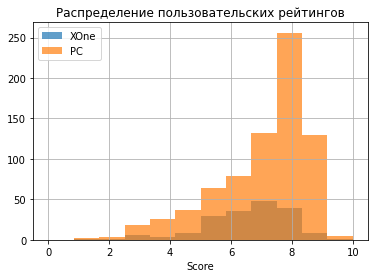

In [125]:
pd.Series(df_games_xone_pc.query('platform == "XOne"')['user_score']).hist(range = (0,10),bins=12, label='XOne', alpha=0.7)#построим гистограмму с предельными значениями из describe

pd.Series(df_games_xone_pc.query('platform == "PC"')['user_score']).hist(range = (0,10),bins=12, label='PC',  alpha=0.7)#построим гистограмму с предельными значениями из describe

plt.xlabel('Score')
plt.legend()
plt.title('Распределение пользовательских рейтингов')

Распределение по платформе XOne имеет нормальный вид (возможно слегка скошенность влево), по платформе PC -  имеют скошенность влево.

Для проверки гипотезы требуется сравнивать средние двух генеральных совокупностей между собой. Наши совокупности  не зависят  друг от друга, одно из распределений  имеет скошенность, дисперсии рассмариваемых совокупностей не равны. Поэтому параметр 'equal_var' принимает значение False при -тесте:

In [126]:
alpha = .05 # критический уровень статистической значимости
            # можно указать .05 или 0.05

results = st.ttest_ind(df_games_xone_pc.query('platform == "XOne"')['user_score'], df_games_xone_pc.query('platform == "PC"')['user_score'], equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 3.442937492775816e-06
Отвергаем нулевую гипотезу


**Вывод:**
- нулевая гипотеза не верна
- Средние пользовательские рейтинги платформ Xbox One и PC отличаются.

### Гипотеза "Средние пользовательские рейтинги жанров Action и Sports разные"

Для проверки гипотезы используем таблицу на основе **'df_games'**.

In [127]:
df_games_action_sports = df_games.loc[(df_games.genre == 'Action') | (df_games.genre == 'Sports')].reset_index(drop=True)

In [128]:
df_games_action_sports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5486 entries, 0 to 5485
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             5486 non-null   object 
 1   platform         5486 non-null   object 
 2   year_of_release  5486 non-null   float64
 3   genre            5486 non-null   object 
 4   na_sales         5486 non-null   float64
 5   eu_sales         5486 non-null   float64
 6   jp_sales         5486 non-null   float64
 7   other_sales      5486 non-null   float64
 8   critic_score     3016 non-null   float64
 9   user_score       2877 non-null   float64
 10  rating           3624 non-null   object 
 11  all_sales        5486 non-null   float64
dtypes: float64(8), object(4)
memory usage: 514.4+ KB


Пропусков по оценкам нет!

О большом объёме данных, генеральной совокупности, мы будем судить по части — случайной выборке, которая у нас имеется.
Сформулируем нулевую и ненулевую гипотезы:
- H₀: Средние пользовательские рейтинги жанров Action и Sports разные;
- H₁: Средние пользовательские рейтинги жанров Action и Sports не отличаются.

Остается только на основе данных сделать выбор: отклонить нулевую гипотезу в пользу альтернативной или нет.

Для этого нужно посчитать вероятность получить наблюдаемое на выборке среднее значение при условии, что нулевая гипотеза верна. Если вероятность большая — отвергать нулевую гипотезу вряд ли стоит.

У нас есть две выборки - данные по жанру Action и по жанру Sports. Проверим дисперсии выборок по параметру рейтинга жанра:

In [129]:
variance_action = np.var(df_games_action_sports.query('genre == "Action"')['user_score'], ddof=1)
variance_sports = np.var(df_games_action_sports.query('genre == "Sports"')['user_score'], ddof=1)

print(variance_action) 
print('')
print(variance_sports) 

2.027493768262496

2.623055812519272


Теперь посмотрим на распределение выборок:

In [130]:
print(df_games_action_sports.query('genre == "Action"')['user_score'].describe())
print('')
print(df_games_action_sports.query('genre == "Sports"')['user_score'].describe())

count    1796.000000
mean        7.058129
std         1.423901
min         0.300000
25%         6.300000
50%         7.400000
75%         8.100000
max         9.500000
Name: user_score, dtype: float64

count    1081.000000
mean        6.951434
std         1.619585
min         0.200000
25%         6.100000
50%         7.400000
75%         8.100000
max         9.500000
Name: user_score, dtype: float64


Text(0.5, 1.0, 'Распределение пользовательских рейтингов')

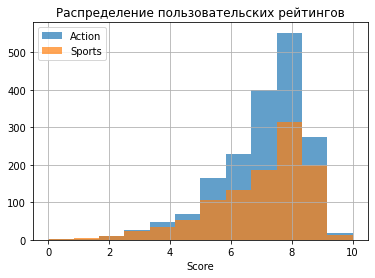

In [131]:
pd.Series(df_games_action_sports.query('genre == "Action"')['user_score']).hist(range = (0,10),bins=12, label='Action', alpha=0.7)#построим гистограмму с предельными значениями из describe

pd.Series(df_games_action_sports.query('genre == "Sports"')['user_score']).hist(range = (0,10),bins=12, label='Sports',  alpha=0.7)#построим гистограмму с предельными значениями из describe

plt.xlabel('Score')
plt.legend()
plt.title('Распределение пользовательских рейтингов')

Распределение по жанру Sports имеет нормальный вид (возможно слегка скошенность влево), по жанру Action -  имеют скошенность влево.

Для проверки гипотезы требуется сравнивать средние двух генеральных совокупностей между собой. Наши совокупности  не зависят  друг от друга, одно из распределений  имеет скошенность, дисперсии рассмариваемых совокупностей не равны. Поэтому параметр 'equal_var' принимает значение False при -тесте:

In [138]:
alpha = .05 # критический уровень статистической значимости
            # можно указать .05 или 0.05

results = st.ttest_ind(df_games_action_sports.query('genre == "Action"')['user_score'], df_games_action_sports.query('genre == "Sports"')['user_score'], equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: nan
Не получилось отвергнуть нулевую гипотезу


**Вывод:**
- нулевая гипотеза не верна
- Средние пользовательские рейтинги жанров Action и Sports не отличаются.

## ВЫВОДЫ

Согласно представленным входным данным проведен анализ продаж игр на раличных платформах до 2016 года. 

Для начала был выявлен ряд несоответствий, пропуски данных, неверные форматы и тд. Такие моменты были устранены. Дополнительно были добавлены необходимые данные. 

Благодаря анализу было принято решение не рассматривать продажи до 1993 года. Далее проведен анализ распределения продаж по годам и выявлен жизненный цикл наиболее продаваемых платформ. В основном он оставлял 10 лет. Однако, если смотреть глубже. то видно, что 5 лет - вполне реальный срок жизни платформы, особенно ближе к 2016 году (опять же если проводить анализ последних 5 лет продаже, то скорее всего будет выявлен еще более короткий сроки жизни платформы, что является интересным фактом, подтверждающим скоротечное развитие гейм-индустрии).

был проведен анализ продаж за последние 5 лет, выявлены платформы-лидеры по продажам, в анализе видно, что у таких платформ продажи в наале жизни растут, достигают какого-то пика, далее продажи идут на спад, что закономерно, по причине того, что выпускаются новые платформы, более современные, конкурентные.

Были проанализированы продажи таких лидирующих платформ по играм. Заметно, что "вес" продаж составляют игры в определенном ценовом сегменте ("ящик с усами"), что наблюдаются конечно же выпада по продажаам каких-то игр, вклад которых не так велик в основную массу продаж. По всем 5 платформам аналогичный вывод! 

Дополнительно рассмотрели продажи всех 5 платформ на зависимость от оценок пользователей и критиков. Изначально благодаря диаграммам рассеивания напрашивался вывод прямой зависимости продаж от оценок. Однако, рассчет корреляции показал, что нет плотной связи между продажами и оуенками. Такое можно объяснить тем, что в данных очень много пропусков по оценкам (примерно 50%). Для более правильного анализа и ответа на такой вопрос требуется изучить данные без потери оценок. Невозможно утверждать, что продажи игр не зависят от оценок, тк гейм-индустрия является все-таки очень зависимой от мнений критиков, в условиях постоянных видеообзоров геймеров и знатаков.  

Проведен анализ самых популярных  жанров среди игр. Продажи жанров-лидеров в принципе нельзя считать категорически отличающимися в несколько раз. Но тем не менее видно так называемых "лузеров", которых можно игнорировать при планировании рекласных кампаний. 

Проведен также анализ пользователей регионов Северная Америка, Европа и Япония. Выявлены платформы-лидеры для этих регионов, жанры игр для них и возрастной рейтинг игр. На это можно сделать упор при формировании позиций продаж в магазине! 


Далее проверили несколько гипотез и установили:
- Средние пользовательские рейтинги платформ Xbox One и PC отличаются;
- Средние пользовательские рейтинги жанров Action и Sports не отличаются.


Можно сделать предположение: магазину можно предложить концентрироваться на продажах более рейтинговых платформ, а также попробовать разработаться с рейтингами жанров, которым отдают предпочтение пользователи, посмотреть наиболее чистые данные по рейтингам, чтобы выявить лидирующие позиции. Либо опираться тлько на зависимость продаж от регионов, делая упор на разного рода пользователя!